<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Perfusion/blob/main/BPL_TEST2_Perfusion_colab_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Perfusion script with PyFMI ver 2.9.8

The key library PyFMI v2.9.8 is installed.

After the installation a small application BPL_TEST2_Perfusion is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_22.11.1-1-Linux-x86_64.sh 
!chmod +x Miniconda3-py38_22.11.1-1-Linux-x86_64.sh
!bash ./Miniconda3-py38_22.11.1-1-Linux-x86_64.sh -b -f -p /usr/local 
import sys 
sys.path.append('/usr/local/lib/python3.8/site-packages/')

--2023-01-25 10:17:20--  https://repo.anaconda.com/miniconda/Miniconda3-py38_22.11.1-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64630241 (62M) [application/x-sh]
Saving to: ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’

Miniconda3-py38_22. 100%[===================>]  61.64M   124MB/s    in 0.5s    

2023-01-25 10:17:21 (124 MB/s) - ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’ saved [64630241/64630241]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | / - \ done
Executing transaction: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       h06a4308_0         120 KB
    conda-23.1.0               |   py38h06a4308_0         942 KB
    conda-package-handling-2.0.2|   py38h06a4308_0         267 KB
    conda-package-streaming-0.7.0|   py38h06a4308_0          26 KB
    cryptography-38.0.4        |   py38h9ce1e76_0         1.4 MB
    sqlite-3.40.1              |       h5082296_0         1.2 MB
    urllib3-1.26.14            |   py38h06a4308_0         196 KB
    xz-5.2.10                  |       h5eee18b_1         429 KB
    zstandard-0.18.0           |   py38h5eee18b_0         434 KB
    ------------------------------------------------------------
                             

In [ ]:
!conda --version
!python --version

conda 23.1.0
Python 3.8.15


In [ ]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-forge
    assimulo-3.3               |   py38h71f17ff_1         2.4 MB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |

# Notes of BPL_TEST2_Perfusion

This notebook explore perfusion cultivation in comparison with ordinary continuous cultivation (chemostat) and use comparable settings to earlier notebook. Further you see here examples of interaction with the simplified commands par(), init(), simu() etc as well as direct interaction with the FMU which is called "model" here. The last simulation is always available in the workspace and called "sim_res". Note that describe() brings mainly up from descriptive information from the Modelica code from the FMU but is complemented by some information given in the Python setup file.

Now specific installation run a simulation and notebook for that
Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Perfusion_linux_om_me.fmu
* Setup-file - BPL_TEST2_Perfusion_explore.py

In [1]:
%%bash 
git clone https://github.com/janpeter19/BPL_TEST2_Perfusion

bash: line 1: git: command not found


CalledProcessError: Command 'b'git clone https://github.com/janpeter19/BPL_TEST2_Perfusion\n'' returned non-zero exit status 127.

In [ ]:
%cd BPL_TEST2_Perfusion

In [23]:
run -i BPL_TEST2_Perfusion_explore_me.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


<Figure size 984.252x787.402 with 0 Axes>

In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [25]:
# Process parameters used throughout
par(Y=0.5, qSmax=0.75, Ks=0.1)                                      # Culture
par(filter_eps=0.10, filter_alpha_X=0.02, filter_alpha_S=0.10)      # Filter
par(S_in=30.0)                                                      # Inlet substrate conc 
init(V_0=1.0, VX_0=1.0)                                             # Process initial conditions that are common
eps = parDict['filter_eps']                                         # Pump schedule parameter 

In [26]:
parDict

{'V_0': 1.0,
 'VX_0': 1.0,
 'VS_0': 100.0,
 'Y': 0.5,
 'qSmax': 0.75,
 'Ks': 0.1,
 'filter_eps': 0.1,
 'filter_alpha_X': 0.02,
 'filter_alpha_S': 0.1,
 'S_in': 30.0,
 'harvesttank_V_0': 0.0,
 'harvesttank_X_0': 0.0,
 'harvesttank_S_0': 0.0,
 'pump1_t0': 0.0,
 'pump1_F0': 0.0,
 'pump1_t1': 17.0,
 'pump1_F1': 4.0,
 'pump1_t2': 50.0,
 'pump1_F2': 4.0,
 'pump1_t3': 993.0,
 'pump1_F3': 4.0,
 'pump1_t4': 994.0,
 'pump1_F4': 4.0,
 'pump2_t0': 0.0,
 'pump2_F0': 0.0,
 'pump2_t1': 17.0,
 'pump2_F1': 4.0,
 'pump2_t2': 50.0,
 'pump2_F2': 4.0,
 'pump2_t3': 993.0,
 'pump2_F3': 4.0,
 'pump2_t4': 994.0,
 'pump2_F4': 4.0}

stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.


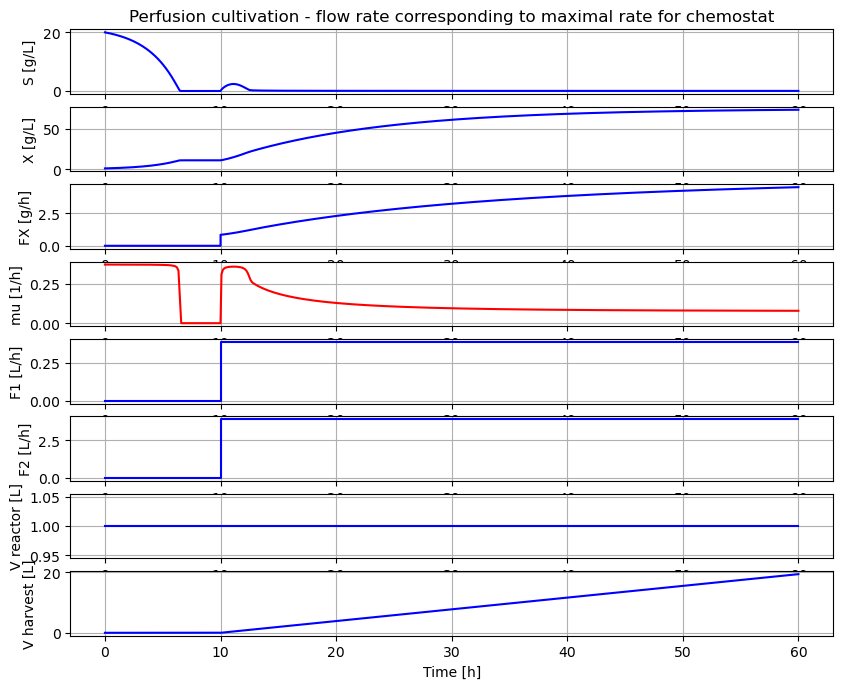

In [27]:
# Simulation of process with flow rate clot to wash-out for chemostat

init(VS_0=20)                                            # Process initial                   
par(pump1_t1=10, pump2_t1=10)                            # Pump schedule - recycle flow 10 times perfusion flow
par(pump1_F1=2.5*0.155, pump2_F1=2.5*0.155/eps)  
par(pump1_t2=940, pump2_t2=940, pump1_t3=950, pump2_t3=950, pump1_t4=960, pump2_t4=960)

newplot(title='Perfusion cultivation - flow rate corresponding to maximal rate for chemostat')
simu(60)

In [28]:
# Concentration factor of the filter
c=model.get('filter.retentate.c[1]')[0]/model.get('filter.inlet.c[1]')[0]
print('Conc factor of perfusion filter =', np.round(c,3))

Conc factor of perfusion filter = 1.089


In [29]:
c_data=sim_res['filter.retentate.c[1]']/sim_res['filter.inlet.c[1]']
print('Conc factor variation', np.round(min(c_data[151:]), 3), np.round(max(c_data[151:]),3))

Conc factor variation 1.089 1.089


/tmp/ipykernel_3163/3491953895.py:1: RuntimeWarning: invalid value encountered in divide
  c_data=sim_res['filter.retentate.c[1]']/sim_res['filter.inlet.c[1]']


stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.


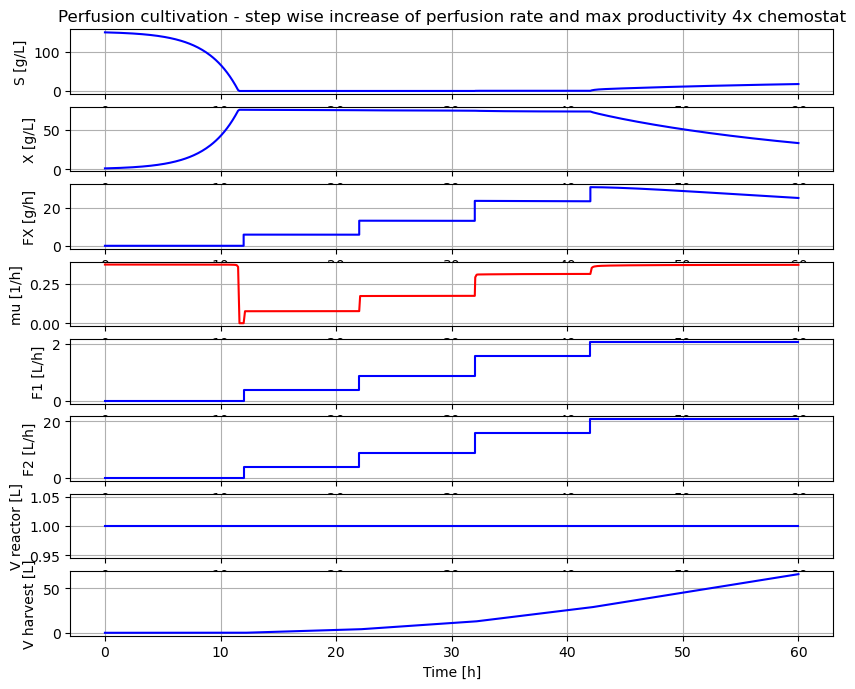

In [30]:
# Simulation of process with step-wise increase of pefusion rate until wash-out.
# This means that re-circulation rate change at the same time as the perfusion rate.

init(VS_0=150)                                           # Process initial varied                                         

par(pump1_t1=12, pump2_t1=12)                            # Pump schedule - recycle flow 10 times perfusion flow
par(pump1_F1=2.5*0.155, pump2_F1=2.5*0.155/eps)  
par(pump1_t2=22, pump2_t2=22) 
par(pump1_F2=2.5*0.35, pump2_F2=2.5*0.35/eps) 
par(pump1_t3=32, pump2_t3=32) 
par(pump1_F3=2.5*0.63, pump2_F3=2.5*0.63/eps) 
par(pump1_t4=42, pump2_t4=42) 
par(pump1_F4=2.5*0.83, pump2_F4=2.5*0.83/eps) 

newplot(title='Perfusion cultivation - step wise increase of perfusion rate and max productivity 4x chemostat')
simu(60)

In [31]:
# Simulation without a plot and just to check typical values at high production rate
simu(40)
c_data=sim_res['filter.retentate.c[1]']/sim_res['filter.inlet.c[1]']
print('Conc factor variation', np.round(min(c_data[190:]), 3), 'to', np.round(max(c_data[190:]),3))

stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
stdout            | warning | The default linear solver fails, the fallback solver with total pivoting is started at time 0.000000. That might raise performance issues, for more information use -lv LOG_LS.
Conc factor variation 1.089 to 1.089


/tmp/ipykernel_3163/3195256660.py:3: RuntimeWarning: invalid value encountered in divide
  c_data=sim_res['filter.retentate.c[1]']/sim_res['filter.inlet.c[1]']


In [32]:
#describe('cstrProdMax')

In [33]:
# The maximal biomass productivity before washout is obtained aroudn 40 hours
np.round(model.get('harvesttank.inlet.F')[0]*model.get('harvesttank.inlet.c[1]')[0],1)

23.5

In [34]:
# Thus perfusion (with this filter) brings a productivity improvement of about
np.round(23.5/5.6,1)

4.2

In [35]:
# Finally we check the filter flow rates at time 40 hour - note the negative sign for outlfow
model.get('filter.inlet.F')[0]

15.749999999999998

In [36]:
model.get('filter.filtrate.F')[0]

-1.575

In [37]:
model.get('filter.retentate.F')[0]

-14.174999999999999

## Summary
* The perfusion filter had a concentration factor of cells around 1.08 and re-cycling flow was set to a factor 10 higher than the perfusion rate and changed when perfusion rate was change to keep the ratio factor 10. 
* The first simulation showed that by cell retention using perfusion filter the process could be run at a perfusion flow rate at the maximal flow rate possible for corresponding chemostat culture and cell concetration increased steadily.
* The second simulation showed that with a proper startup cell concentration, the cell concentration remained constant when perfusion rate increased in a similar way as what we see in a chemostat. 
* The second simulation also showed that biomass productivity in this case was increased by a factor 4.2 compared to chemostat.
* If the perfusion rate increased to higher levels washout started but the decrase of cell concentration was slow.

Some of you who read this may have your perfusion experience with CHO-cultures. For such cultures the cell concentration do increase with increase of perfusion rate and there are understood reasons for that. But for this simplifed process as well as microbial processes they typically keep cell concentration constant when flow rate is chaged, and that under quite wide conditions. I will try come back to this phenomena in a later notebook.

In [38]:
# List of components in the process setup and also a couple of other things like liquidphase and D
describe('parts')

['bioreactor', 'bioreactor.culture', 'D', 'feedtank', 'filter', 'harvesttank', 'schemePump1', 'schemePump2']


In [39]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [40]:
system_info()


System information
 -OS: Linux
 -Python: 3.8.16
 -Scipy: not installed in the notebook
 -PyFMI: 2.9.8
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0~dev-185-g9d983b8
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_TEST2.Perfusion
 -Generated: 2023-01-25T11:02:31Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1-beta
 -Interaction: FMU-explore version 0.9.6
